In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
D1=pd.read_csv("/content/diabetes.csv")

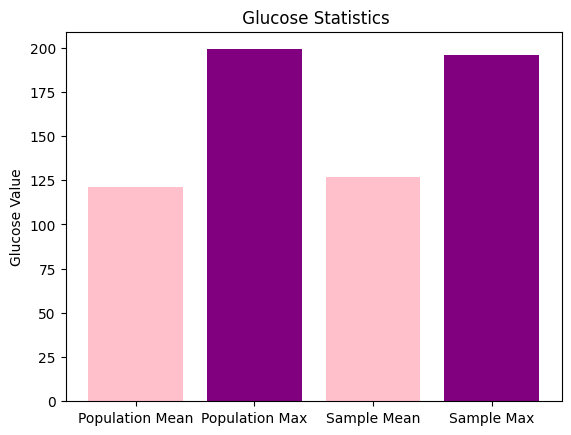

In [6]:

np.random.seed(670)


model = D1.sample(25)

population_mean_glucose = D1['Glucose'].mean()
population_max_glucose = D1['Glucose'].max()

sample_mean_glucose = model['Glucose'].mean()
sample_max_glucose = model['Glucose'].max()


# Create a bar chart for comparison
lbls = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
vls = [population_mean_glucose, population_max_glucose, sample_mean_glucose, sample_max_glucose]

plt.bar(lbls, vls, color=['pink', 'purple', 'pink', 'purple'])
plt.title(' Glucose Statistics')
plt.ylabel('Glucose Value')
plt.show()


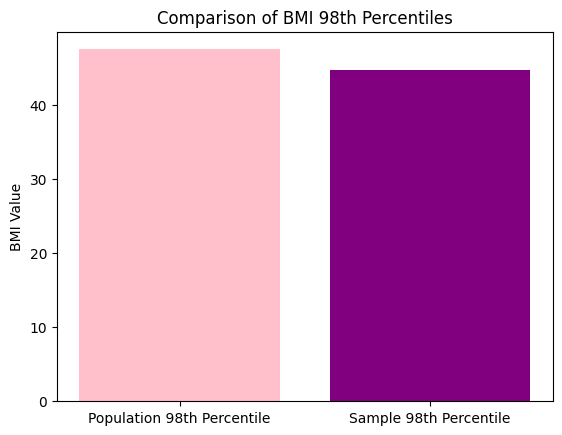

In [7]:
population_percent = np.percentile(D1['BMI'], 98)
sample_percent = np.percentile(model['BMI'], 98)

lbls = ['Population 98th Percentile', 'Sample 98th Percentile']
vls = [population_percent, sample_percent]

plt.bar(lbls, vls, color=['pink', 'purple'])
plt.title('Comparison of BMI 98th Percentiles')
plt.ylabel('BMI Value')
plt.show()

In [11]:

bs_samples = 500
sample_size = 150


bs_means = np.zeros(bs_samples)
bs_std_devs = np.zeros(bs_samples)
bs_percentiles = np.zeros(bs_samples)


for i in range(bs_samples):
    bs_samples = D1['BloodPressure'].sample(sample_size, replace=True)
    bs_means[i] = bs_samples.mean()
    bs_std_devs[i] = bs_samples.std()
    bs_percentiles[i] = np.percentile(bs_sample, 98)


population_mean = D1['BloodPressure'].mean()
population_std_dev = D1['BloodPressure'].std()
population_percentile = np.percentile(D1['BloodPressure'], 98)


bmean=np.mean(bs_means)
bsd=np.mean(bs_std_devs)
bp=np.mean(bs_percentiles)


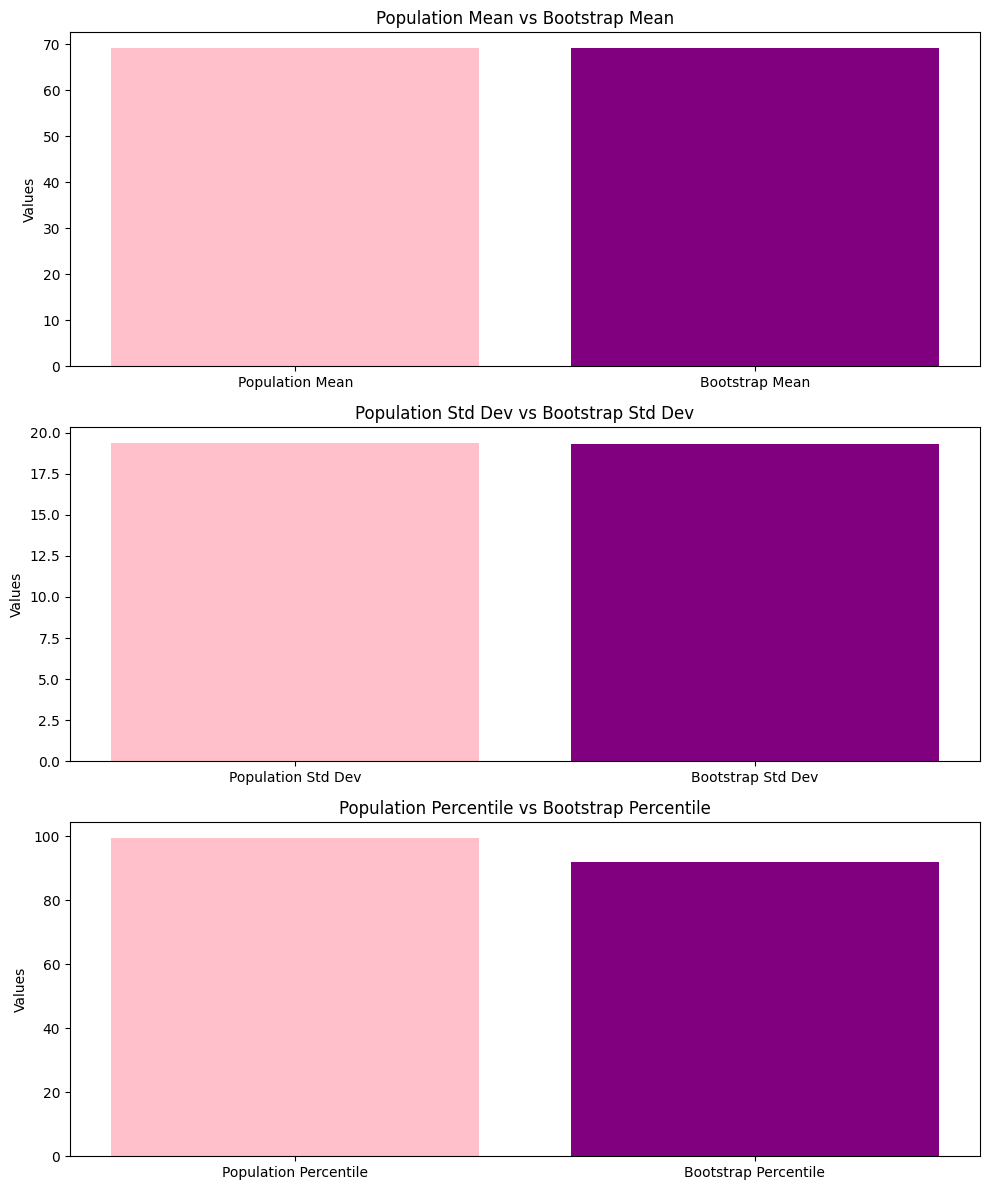

In [12]:
fig, axis = plt.subplots(3, 1, figsize=(10, 12))


axis[0].bar(['Population Mean', 'Bootstrap Mean'], [population_mean, bmean], color=['pink', 'purple'])
axis[0].set_ylabel('Values')
axis[0].set_title('Population Mean vs Bootstrap Mean')


axis[1].bar(['Population Std Dev', 'Bootstrap Std Dev'], [population_std_dev, bsd], color=['pink', 'purple'])
axis[1].set_ylabel('Values')
axis[1].set_title('Population Std Dev vs Bootstrap Std Dev')


axis[2].bar(['Population Percentile', 'Bootstrap Percentile'], [population_percentile, bp], color=['pink', 'purple'])
axis[2].set_ylabel('Values')
axis[2].set_title('Population Percentile vs Bootstrap Percentile')

plt.tight_layout()
plt.show()